In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bids_df = pd.read_csv("Eden_MEV-boost_bid_20240324_0050.csv")
payload_df = pd.read_csv("Eden_MEV-boost_payload_20240324-20240322.csv")
df = pd.read_csv("Eden_MEV-boost_payload_20240324-20230722.csv")

In [3]:
bids_df['value'] = bids_df['value'].astype('float')
payload_df['value'] = payload_df['value'].astype('float')
payload_df['block_timestamp'] = pd.to_datetime(payload_df['block_timestamp'])
bids_df['block_timestamp'] = pd.to_datetime(bids_df['block_timestamp'], format='mixed')
bids_df['timestamp'] = pd.to_datetime(bids_df['timestamp'], format='mixed')
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df_origin = df

# 1. EDA of MEV-boost Payloads

### 1-1 The bar charts of value/num_tx/gas_used trends within a day, using payloads data from 3/22 to 3/24, 2024.

In [4]:
payload_df['block_timestamp_seconds'] = payload_df['block_timestamp'].dt.hour * 3600 + payload_df['block_timestamp'].dt.minute * 60 + payload_df['block_timestamp'].dt.second
date_range = ['2024-03-24', '2024-03-23', '2024-03-22']
n_days = len(date_range)
payload_df_drop = payload_df[payload_df['block_timestamp'].dt.date.astype(str).isin(date_range)].drop_duplicates(subset=['block_timestamp'])

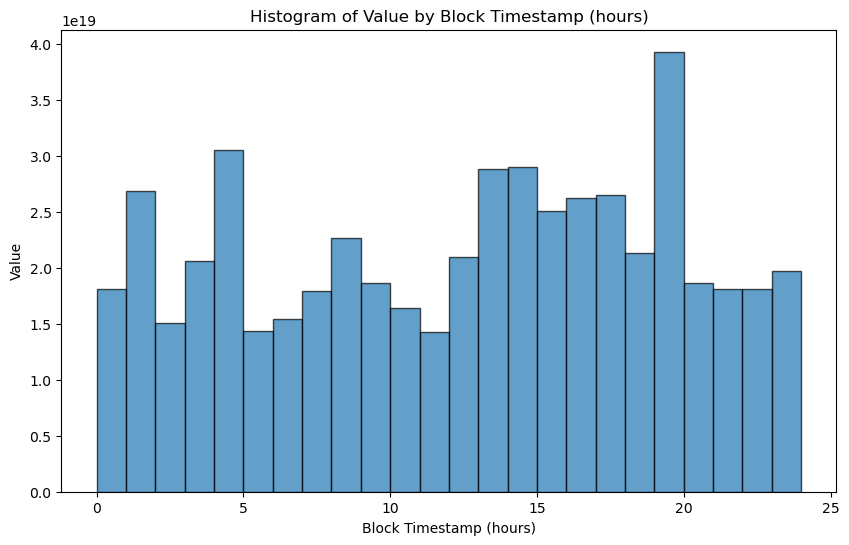

In [5]:
# value
plt.figure(figsize=(10, 6))
plt.hist(payload_df_drop['block_timestamp_seconds'] / 3600, bins=range(0, 25), weights=payload_df_drop['value']/n_days, edgecolor='black', alpha=0.7)

plt.title('Histogram of Value by Block Timestamp (hours)')
plt.xlabel('Block Timestamp (hours)')
plt.ylabel('Value')

plt.show()

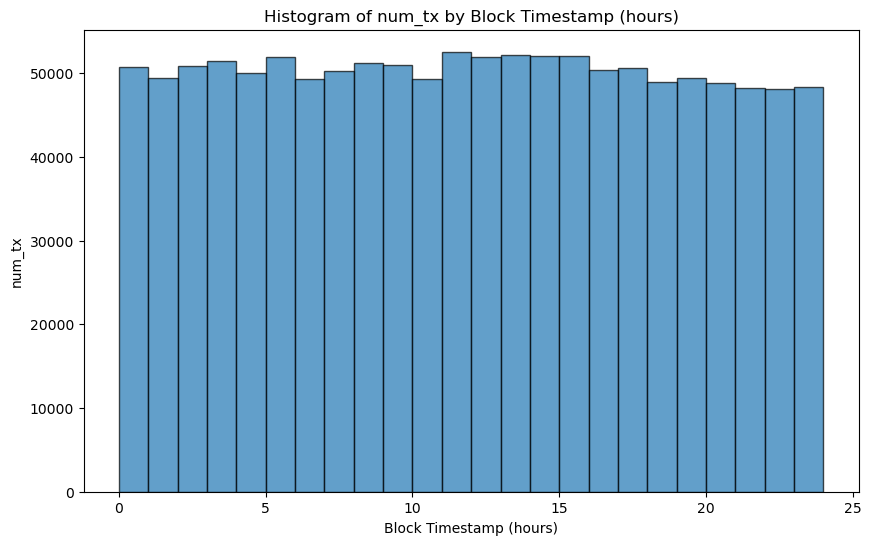

In [6]:
# num_tx
plt.figure(figsize=(10, 6))
plt.hist(payload_df_drop['block_timestamp_seconds'] / 3600, bins=range(0, 25), weights=payload_df_drop['num_tx']/n_days, edgecolor='black', alpha=0.7)

plt.title('Histogram of num_tx by Block Timestamp (hours)')
plt.xlabel('Block Timestamp (hours)')
plt.ylabel('num_tx')

plt.show()

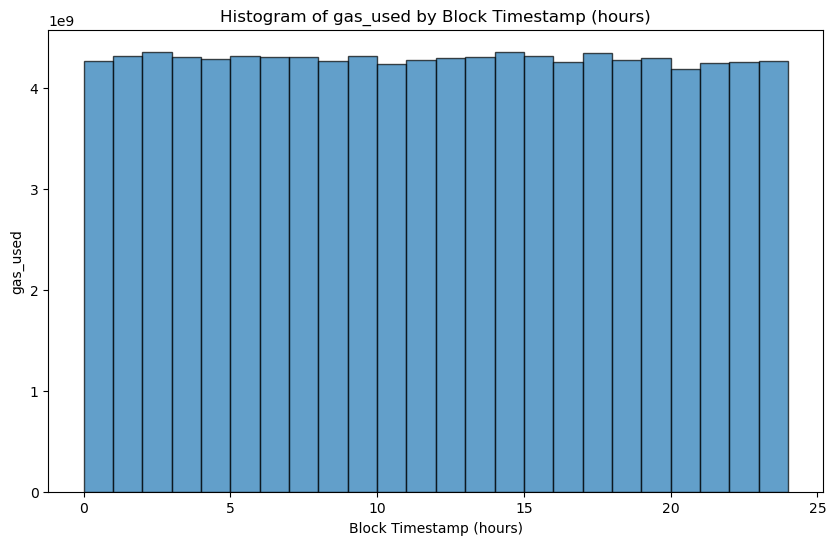

In [7]:
# gas_used
plt.figure(figsize=(10, 6))
plt.hist(payload_df_drop['block_timestamp_seconds'] / 3600, bins=range(0, 25), weights=payload_df_drop['gas_used']/n_days, edgecolor='black', alpha=0.7)

plt.title('Histogram of gas_used by Block Timestamp (hours)')
plt.xlabel('Block Timestamp (hours)')
plt.ylabel('gas_used')

plt.show()

### 1-2 Correlation matrix

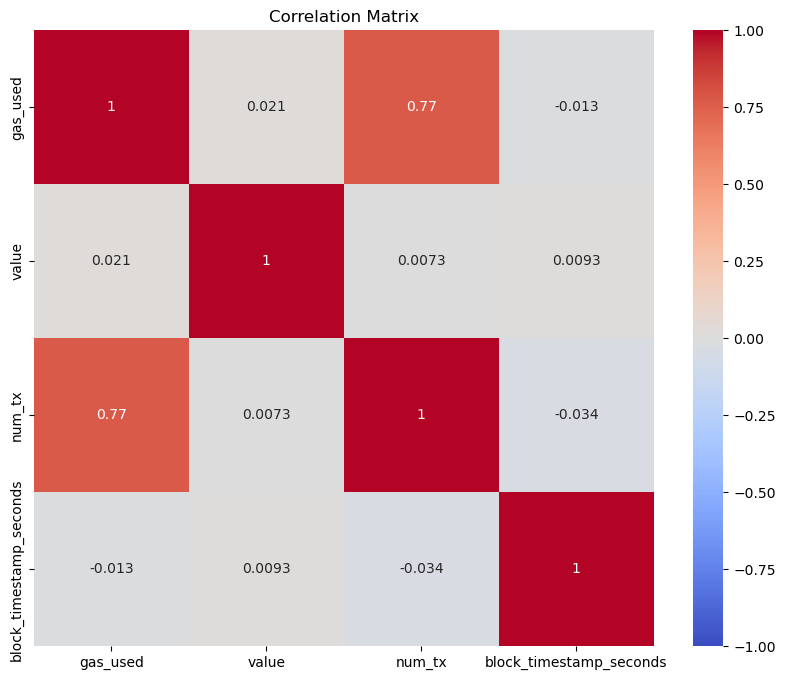

In [8]:
# matrix
numeric_cols = ['gas_used', 'value', 'num_tx', 'block_timestamp_seconds']

corr_matrix = payload_df_drop[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 1-3 Those charts depict trends in value, number of transactions, and gas used over an 8-month period.
Select payloads data from 2024-03-24 to 2023-07-22, filtering those with block numbers ending in 00 or 50


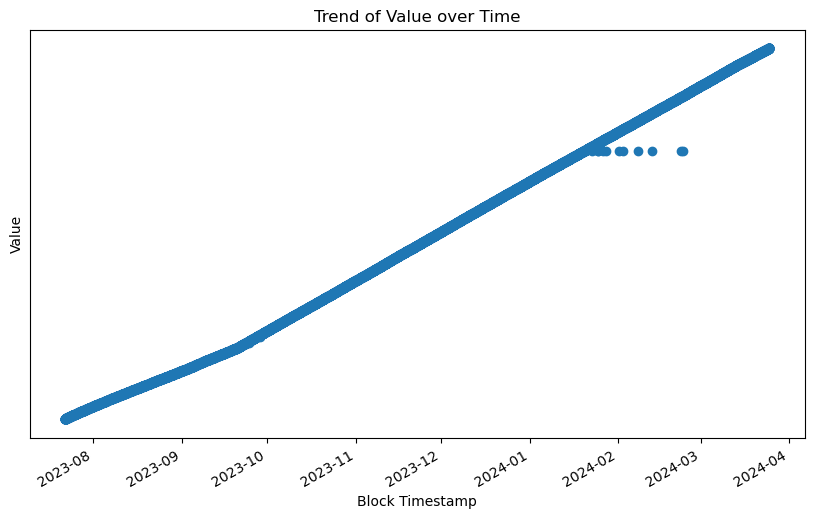

In [9]:
# value
df = df.drop_duplicates(subset=['block_timestamp'])
df = df.sort_values(by='block_timestamp')

plt.figure(figsize=(10, 6))
plt.scatter(df['block_timestamp'], df['value'], marker='o')
plt.yticks([])

plt.title('Trend of Value over Time')
plt.xlabel('Block Timestamp')
plt.ylabel('Value')

plt.gcf().autofmt_xdate()

plt.show()

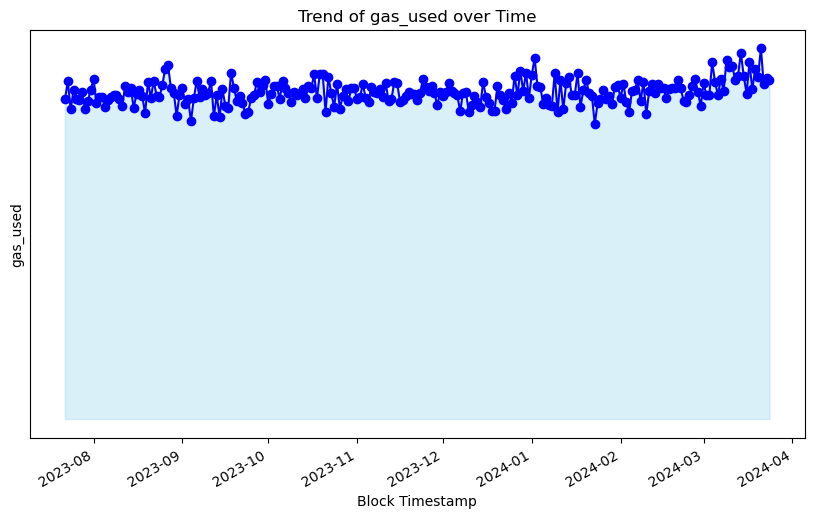

In [10]:
# gas_used
df_daily_mean = df.groupby(df['block_timestamp'].dt.date)['gas_used'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.fill_between(df_daily_mean['block_timestamp'], df_daily_mean['gas_used'], color='skyblue', alpha=0.3)
plt.plot(df_daily_mean['block_timestamp'], df_daily_mean['gas_used'], marker='o', color='blue')
plt.yticks([])

plt.title('Trend of gas_used over Time')
plt.xlabel('Block Timestamp')
plt.ylabel('gas_used')

plt.gcf().autofmt_xdate()

plt.show()

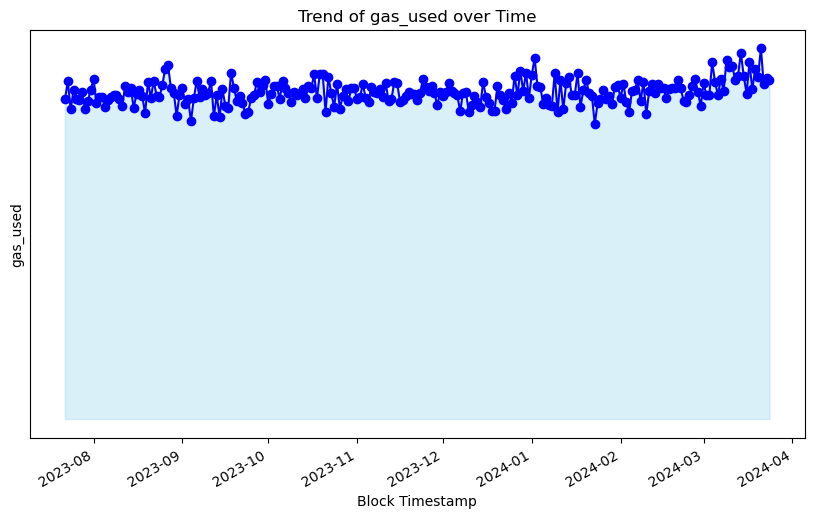

In [11]:
# gas_used
df_daily_mean = df.groupby(df['block_timestamp'].dt.date)['gas_used'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.fill_between(df_daily_mean['block_timestamp'], df_daily_mean['gas_used'], color='skyblue', alpha=0.3)
plt.plot(df_daily_mean['block_timestamp'], df_daily_mean['gas_used'], marker='o', color='blue')
plt.yticks([])

plt.title('Trend of gas_used over Time')
plt.xlabel('Block Timestamp')
plt.ylabel('gas_used')

plt.gcf().autofmt_xdate()

plt.show()

### 1-4 Distribution of num_tx and gas_used

num_tx:
mode = 0    132
Name: num_tx, dtype: int64
median = 145.0
mean = 156.49830980314178
std = 60.02717582227913
skewness = 4.149655123595991
kurtosis = 40.76344699969226


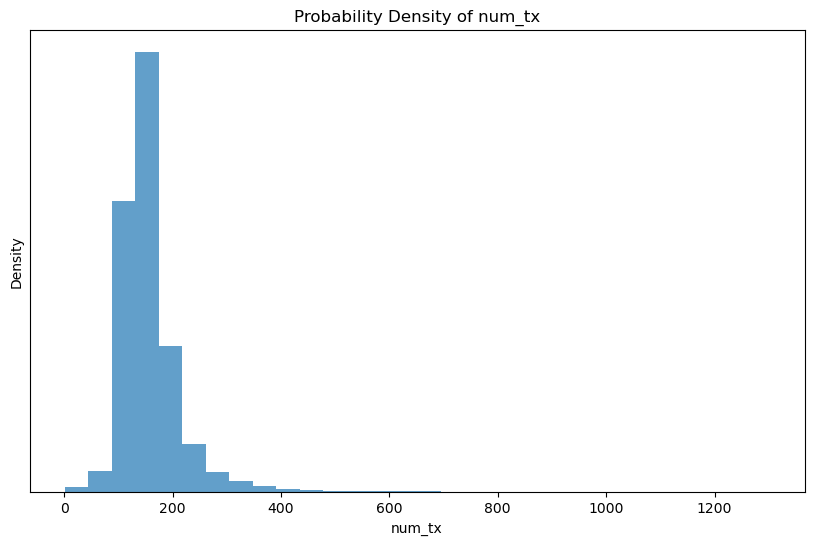

In [12]:
#num_tx
print("num_tx:")
print("mode =", df['num_tx'].mode())
print("median =", df['num_tx'].median())
print("mean =", df['num_tx'].mean())
print("std =", df['num_tx'].std())
print("skewness =", df['num_tx'].skew())
print("kurtosis =", df['num_tx'].kurt())

plt.figure(figsize=(10, 6))
plt.hist(df['num_tx'], bins=30, density=True, alpha=0.7)
plt.yticks([])

plt.title('Probability Density of num_tx')
plt.xlabel('num_tx')
plt.ylabel('Density')
plt.show()

gas_used:
median = 14298578.5
mean = 15435352.172267515
std = 5299382.88688085
skewness = 1.008892902890024
kurtosis = 0.9305458268523852


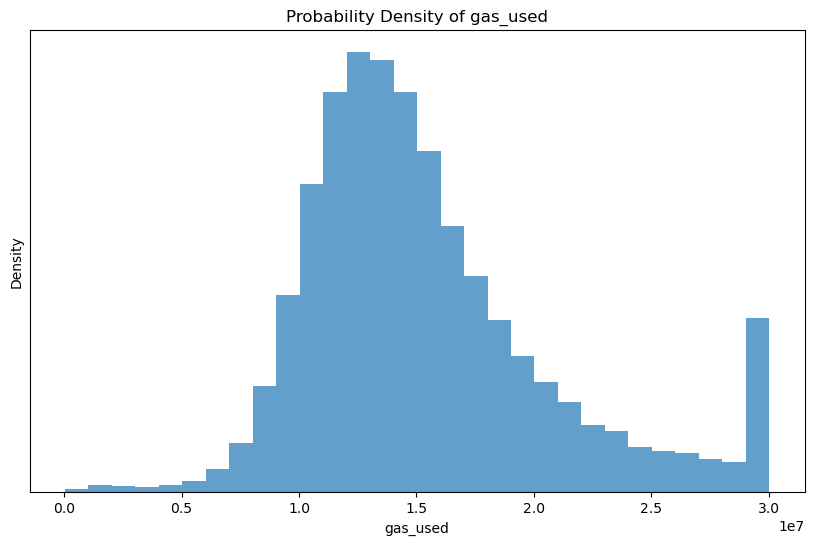

In [13]:
#gas_used
print("gas_used:")
print("median =", df['gas_used'].median())
print("mean =", df['gas_used'].mean())
print("std =", df['gas_used'].std())
print("skewness =", df['gas_used'].skew())
print("kurtosis =", df['gas_used'].kurt())

plt.figure(figsize=(10, 6))
plt.hist(df['gas_used'], bins=30, density=True, alpha=0.7)
plt.yticks([])

plt.title('Probability Density of gas_used')
plt.xlabel('gas_used')
plt.ylabel('Density')
plt.show()

# 2. EDA of MEV-boost Bids

### 2-1 Duplicate block_hash and rows in each block number
Dataset is between 2024-03-24 16:41:35 and 2024-03-24 23:56:59
9

block_timestamp           97727
relay                     97727
slot                      97727
block_hash                97727
builder_pubkey            97727
proposer_pubkey           97727
proposer_fee_recipient    97727
gas_limit                 97727
gas_used                  97727
value                     97727
num_tx                    97727
block_number              97727
timestamp                 97727
optimistic_submission     61086
dtype: int64
Distinct_block_hashs: 54294


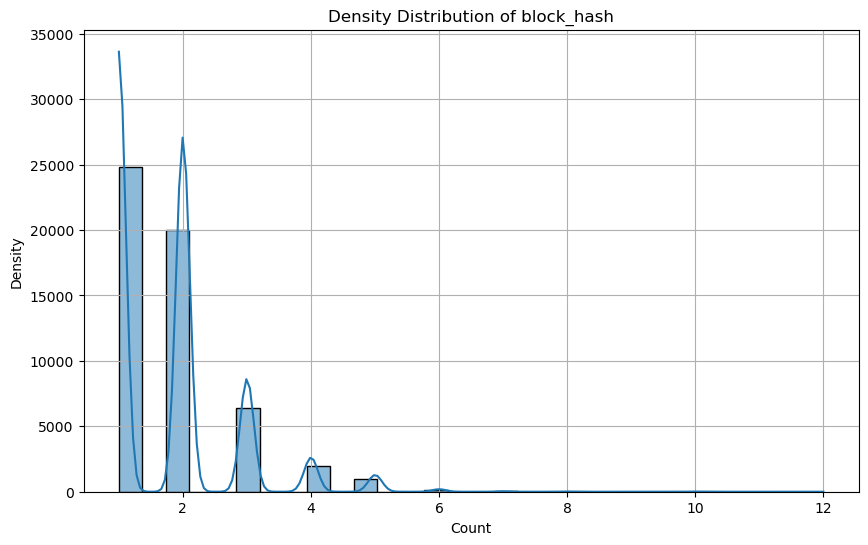

In [14]:
# block_hash count
block_hash_counts = bids_df['block_hash'].value_counts()

block_hash_counts_df = block_hash_counts.reset_index()
block_hash_counts_df.columns = ['block_hash', 'count']

print(bids_df.count()) 

distinct_block_hash = bids_df['block_hash'].nunique()
print(f"Distinct_block_hashs: {distinct_block_hash}")

plt.figure(figsize=(10, 6))
sns.histplot(block_hash_counts_df['count'], kde=True, bins=30)
plt.title('Density Distribution of block_hash')
plt.xlabel('Count')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Distinct block numbers: 44


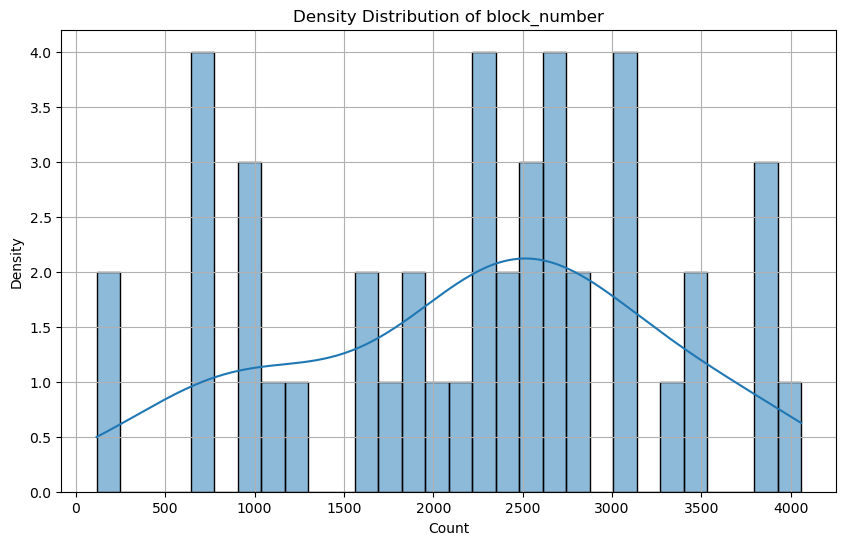

In [15]:
# block_number count
block_number_counts = bids_df['block_number'].value_counts()

block_number_counts_df = block_number_counts.reset_index()
block_number_counts_df.columns = ['block_number', 'count']

distinct_block_numbers = bids_df['block_number'].nunique()
print(f"Distinct block numbers: {distinct_block_numbers}")

plt.figure(figsize=(10, 6))
sns.histplot(block_number_counts_df['count'], kde=True, bins=30)
plt.title('Density Distribution of block_number')
plt.xlabel('Count')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# 3. Find winner blocks

### 3-1 Inner join of payments data and bids data >>> matched_df

In [16]:
matched_df = pd.merge(bids_df, payload_df, on=['block_hash'], how='inner')
row_count = matched_df.shape[0]
print( row_count)
matched_df.dtypes

162


block_timestamp_x           datetime64[ns, UTC]
relay_x                                  object
slot_x                                  float64
block_hash                               object
builder_pubkey_x                         object
proposer_pubkey_x                        object
proposer_fee_recipient_x                 object
gas_limit_x                             float64
gas_used_x                              float64
value_x                                 float64
num_tx_x                                float64
block_number_x                          float64
timestamp                   datetime64[ns, UTC]
optimistic_submission                    object
block_timestamp_y           datetime64[ns, UTC]
relay_y                                  object
slot_y                                    int64
builder_pubkey_y                         object
proposer_pubkey_y                        object
parent_hash                              object
proposer_fee_recipient_y                

In [17]:
distinct_winner_block = matched_df['block_number_x'].nunique()
print(f"Distinct winner block numbers: {distinct_winner_block}")

Distinct winner block numbers: 39


### 3-2 Block timestamp - Timestamp ????? Delay ?????

In [18]:
bids_df['time_difference'] = (bids_df['block_timestamp'] - bids_df['timestamp']).dt.total_seconds()

average_seconds = bids_df['time_difference'].mean()
print(f"The average time difference in all bids is: {average_seconds}")

#winner bids
matched_df['time_difference'] = (matched_df['block_timestamp_x'] - matched_df['timestamp']).dt.total_seconds()

average_seconds_winner = matched_df['time_difference'].mean()
print(f"The average time difference in winners is: {average_seconds_winner}")

The average time difference in all bids is: 0.13162856733553674
The average time difference in winners is: -0.4825679012345679


#### Why it's minus?